In [112]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np



In [144]:
all_data_df = pd.read_csv('/Users/ednovate/Downloads/DFCM/final1.csv',delimiter=',')

In [145]:
np.shape(all_data_df)

(6448, 28)

In [146]:
all_data_df

,tid,school_year,school_code,school_name,t_male,t_birth_year,t_race_ethnicity,t_highest_degree,t_nbpts,t_new_hire,...,t_transfer,t_leave,sch_magnet,sch_year_round,sch_ela_avg,sch_math_avg,sch_enrollment,sch_catchment_area_iep_pct,sch_catchment_area_minority_pct,sch_catchment_area_frpl_pct
0,100001,2017,1303122,Birch Middle,Male,1972,African American,Bachelor,0.0,1,...,0,0,0,0,-0.065031,-0.041866,1227,15.428019,46.461390,32.468161
1,100001,2018,1303122,Birch Middle,Male,1972,African American,Bachelor,0.0,0,...,0,0,0,0,-0.066350,-0.043148,1295,15.140032,41.834311,32.229823
2,100005,2016,1301939,Valley Middle,Male,1977,White,Master,0.0,0,...,0,0,0,0,-0.237181,-0.236813,1125,15.054694,57.302072,40.702964
3,100005,2017,1301939,Valley Middle,Male,1977,White,Master,0.0,0,...,0,0,0,0,-0.198529,-0.212729,1147,13.166557,53.752469,37.574062
4,100005,2018,1301939,Valley Middle,Male,1977,White,Master,NaN,0,...,0,0,0,0,-0.199817,-0.201956,1148,13.126002,54.419366,39.466935
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6443,113886,2018,1300813,Sandpiper Middle,Female,1982,White,Master,0.0,1,...,0,0,0,1,-0.251533,-0.278325,1145,17.324748,53.190664,42.072652
6444,113887,2018,1301937,Marigold Middle,Male,1978,White,Bachelor,0.0,1,...,0,0,0,0,0.006331,-0.066175,1221,12.910608,46.270348,29.225137
6445,113894,2016,1302626,Cedar Middle,Male,1964,White,Bachelor,0.0,0,...,0,0,0,1,-0.025922,-0.060332,1293,14.554415,48.662189,29.943553
6446,113894,2017,1302626,Cedar Middle,Male,1964,White,Bachelor,0.0,0,...,0,0,0,1,-0.026862,-0.061798,1360,16.600123,47.834767,29.837224


In [115]:
include =['object', 'float', 'int'] 


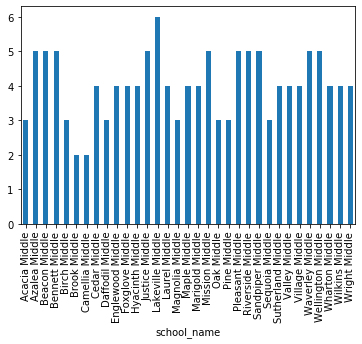

In [116]:
# Snapshot of teacher diversity

all_data_df.groupby('school_name')['t_race_ethnicity'].nunique().plot(kind='bar')


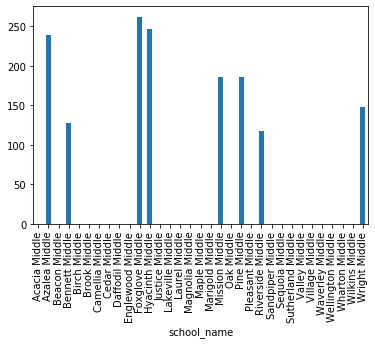

In [117]:

# Which schools have magnets?

all_data_df.groupby('school_name')['sch_magnet'].sum().plot(kind='bar')


## Clean magnet schools from dataset



In [119]:
# clean using numpy

all_data_df = np.genfromtxt('/Users/ednovate/Downloads/DFCM/final1.csv',delimiter=',',dtype=None)

/Users/ednovate/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  """Entry point for launching an IPython kernel.


In [120]:
np.shape(all_data_df)

(6449, 28)

In [121]:
# total magnet teachers, just using to verify cleaning is successful

mag = all_data_df[1:,20]
mag = np.array(mag).astype(np.float)
np.sum(mag)

1510.0

In [122]:
no_mag = []

for i in range(len(all_data_df)):
        temp = all_data_df[i,:]

        if (all_data_df[i,3] != 'Azalea Middle') and (all_data_df[i,3] != 'Bennett Middle')  and (all_data_df[i,3] != 'Foxglove Middle') and (all_data_df[i,3] != 'Hyacinth Middle') and (all_data_df[i,3] != 'Mission Middle') and (all_data_df[i,3] != 'Pine Middle') and (all_data_df[i,3] != 'Riverside Middle') and (all_data_df[i,3] != 'Wright Middle'):

            no_mag.append(temp)
        

In [158]:
np.shape(no_mag)

(4939, 28)

In [159]:
no_mag[0]

array(['\ufefftid', 'school_year', 'school_code', 'school_name', 't_male',
       't_birth_year', 't_race_ethnicity', 't_highest_degree', 't_nbpts',
       't_new_hire', 't_novice', 't_experience', 't_job_area',
       't_tenured', 't_salary', 't_eval_principal_observation',
       't_eval_student_growth', 't_stay', 't_transfer', 't_leave',
       'sch_magnet', 'sch_year_round', 'sch_ela_avg', 'sch_math_avg',
       'sch_enrollment', 'sch_catchment_area_iep_pct',
       'sch_catchment_area_minority_pct', 'sch_catchment_area_frpl_pct'],
      dtype='<U35')

In [160]:
# school by school Average IEP per teacher

#convert back to df
# make first row labels again

no_mag_df = pd.DataFrame(no_mag, columns=no_mag[0])

In [ ]:
no_mag_df

In [194]:
#change pesky string variables to numeric to allow for inference

no_mag_df['sch_catchment_area_iep_pct'] = pd.to_numeric(no_mag_df['sch_catchment_area_iep_pct'], errors = 'coerce')

In [202]:
#mean IEP pct 

group_mean_iep = no_mag_df.groupby(['school_name'])['sch_catchment_area_iep_pct'].mean()


In [203]:
# for graphs
group_mean_iep

school_name
Acacia Middle        11.874505
Beacon Middle        15.270374
Birch Middle         14.465227
Brook Middle         11.370822
Camellia Middle      17.658203
Cedar Middle         15.886952
Daffodil Middle      17.679650
Englewood Middle     17.947320
Justice Middle       18.049718
Lakeville Middle     19.787777
Laurel Middle        16.539893
Magnolia Middle      13.717850
Maple Middle         14.088082
Marigold Middle      12.095279
Oak Middle           15.888473
Pleasant Middle       8.551246
Sandpiper Middle     16.661487
Sequoia Middle       16.223565
Sutherland Middle    13.272693
Valley Middle        13.854976
Village Middle       13.456495
Waverley Middle      17.752612
Wellington Middle    11.168077
Wharton Middle       13.318624
Wilkins Middle       14.466700
school_name                NaN
Name: sch_catchment_area_iep_pct, dtype: float64

In [ ]:

group_mean_sg = no_mag_df.groupby(['school_name'])['t_eval_student_growth'].mean()


In [212]:
# obtain parameter estimate Beta1 for (x,y)->('sch_catchment_area_iep_pct', [ 'sch_ela_avg' + 'sch_math_avg')/2 ])

no_mag_df['sch_math_avg'] = pd.to_numeric(no_mag_df['sch_math_avg'], errors = 'coerce')

test_score_math = no_mag_df['sch_math_avg']


In [214]:
no_mag_df['sch_ela_avg'] = pd.to_numeric(no_mag_df['sch_ela_avg'], errors = 'coerce')
test_score_ela = no_mag_df['sch_ela_avg']


In [215]:
# create test score average between math and ela

test_score_both = (test_score_math + test_score_ela)/2



In [217]:
iep_est = no_mag_df['sch_catchment_area_iep_pct']

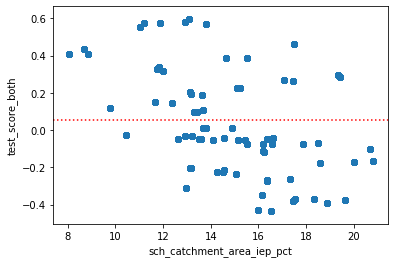

In [275]:
#mean test_score abline

mean_test_both = test_score_both.mean()
plt.axhline(y=mean_test_both, color='r', linestyle='dotted')
plt.xlabel('sch_catchment_area_iep_pct')
plt.ylabel('test_score_both')
plt.scatter(  iep_est, test_score_both)



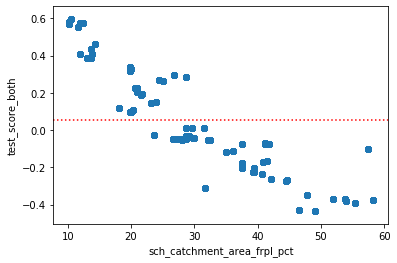

In [276]:

no_mag_df['sch_catchment_area_frpl_pct'] = pd.to_numeric(no_mag_df['sch_catchment_area_frpl_pct'], errors = 'coerce')
free_reduced = no_mag_df['sch_catchment_area_frpl_pct']

#mean test_score abline
mean_test_both = test_score_both.mean()
plt.axhline(y=mean_test_both, color='r', linestyle='dotted')
plt.xlabel('sch_catchment_area_frpl_pct')
plt.ylabel('test_score_both')

plt.scatter(  free_reduced, test_score_both)

In [244]:
# add new column to dataframe for the test_score_both metric
no_mag_df[ 'test_score_both'] = test_score_both



In [245]:
# check to make sure it was added
np.shape(no_mag_df)

(4939, 29)

## VIF test for collinearity

My suspicion is that free and reduced lunch and IEP percentage are highly correlated, so I administered a VIF test for collinearity. If this is the case, I should probably only pick one for a linear model.

In [252]:

from statsmodels.stats.outliers_influence import variance_inflation_factor 
  
no_nan_df = no_mag_df[['test_score_both', 'sch_catchment_area_frpl_pct', 'sch_catchment_area_iep_pct' ]] .dropna() #subset the dataframe
  
# the independent variables set 
X = no_nan_df[['test_score_both', 'sch_catchment_area_frpl_pct', 'sch_catchment_area_iep_pct' ]] 

type(X)

# VIF dataframe 
vif_data = pd.DataFrame() 
vif_data["feature"] = X.columns 
  
# calculating VIF for each feature 
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))] 
  


Strong evidence for high multicollinearity, so we should see which one between 'sch_catchment_area_frpl_pct' and 'sch_catchment_area_iep_pct'
explains most of the variance

In [253]:
# Very high evidence of multicollinearity between free and reduced lunch and IEP.

print(vif_data)

                       feature        VIF
0              test_score_both   4.799583
1  sch_catchment_area_frpl_pct  52.874389
2   sch_catchment_area_iep_pct  51.580302


In [265]:

# Which variable to use? Compare r-squared 
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.sandbox.regression.predstd import wls_prediction_std


## Linear model for test_score_both ~ sch_catchment_area_frpl_pct


In [270]:
# fit our model with .fit() and show results
# we use statsmodels' formula API to invoke the syntax below,
# where we write out the formula using ~
linear_model_frpl = ols("test_score_both ~ sch_catchment_area_frpl_pct", data=no_mag_df).fit()

# summarize our model
linear_model_summary_frpl = linear_model_frpl.summary()


R-squared:	0.836, very high

In [271]:
linear_model_summary_frpl

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        test_score_both   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                 2.507e+04
Date:                Mon, 16 Nov 2020   Prob (F-statistic):               0.00
Time:                        09:48:34   Log-Likelihood:                 3712.5
No. Observations:                4904   AIC:                            -7421.
Df Residuals:                    4902   BIC:                            -7408.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept                       0.6525      0.004    158.686      0.000       0.644       0.661
sch_catchment_area_frpl_pct    -0.0204      0.000   -158.337      0.000      -0.021      -0.020
==============================================================================
Omnibus:                      269.567   Durbin-Watson:                   1.311
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              405.275
Skew:                           0.476   Prob(JB):                     9.90e-89
Kurtosis:                       4.037   Cond. No.                         80.9
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Linear model for test_score_both ~ sch_catchment_area_iep_pct


In [272]:
# fit our model with .fit() and show results
# we use statsmodels' formula API to invoke the syntax below,
# where we write out the formula using ~
linear_model_iep = ols("test_score_both ~ sch_catchment_area_iep_pct", data=no_mag_df).fit()

# summarize our model
linear_model_summary_iep = linear_model_iep.summary()


R-squared:	0.270, which means that we should stick with percent on free and reduced lunch as our predictor as it explains more of the variance

In [273]:
linear_model_summary_iep

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        test_score_both   R-squared:                       0.270
Model:                            OLS   Adj. R-squared:                  0.270
Method:                 Least Squares   F-statistic:                     1813.
Date:                Mon, 16 Nov 2020   Prob (F-statistic):               0.00
Time:                        09:49:33   Log-Likelihood:                 44.564
No. Observations:                4904   AIC:                            -85.13
Df Residuals:                    4902   BIC:                            -72.13
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept                      0.8135      0.018     44.800      0.000       0.778       0.849
sch_catchment_area_iep_pct    -0.0516      0.001    -42.581      0.000      -0.054      -0.049
==============================================================================
Omnibus:                      239.295   Durbin-Watson:                   1.074
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              221.739
Skew:                           0.465   Prob(JB):                     7.08e-49
Kurtosis:                       2.530   Cond. No.                         79.8
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Create a decision boundary and a new column to see which teachers are exceeding predicted test scores based on free or reduced lunch pct.

The coefficients of the linear boundary below were created by the regression model : test_score_both ~ sch_catchment_area_frpl_pct. This block creates a 

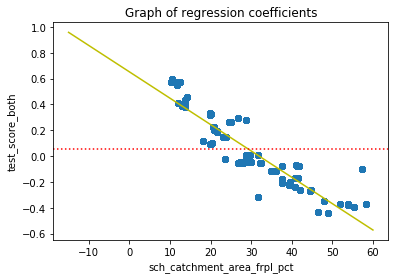

In [280]:


x = np.linspace(-15,60,100)
y =  -0.0204*x + 0.6525

plt.plot(x, y, '-y', label='y =  -0.0204*x + 0.6525')
plt.title('Graph of regression coefficients')



plt.axhline(y=mean_test_both, color='r', linestyle='dotted')
plt.xlabel('sch_catchment_area_frpl_pct')
plt.ylabel('test_score_both')

plt.scatter(  free_reduced, test_score_both)

In [283]:

decision_bound = -0.0204*no_mag_df['sch_catchment_area_frpl_pct'] + 0.6525



In [293]:
no_mag_df['decision_bound'] = decision_bound

no_mag_df['decision_bound']= pd.to_numeric(no_mag_df['decision_bound'], errors = 'coerce')


In [298]:
decision_bound_vec = np.where(no_mag_df['decision_bound'] <no_mag_df['test_score_both'] , 1, 0)


    

In [305]:
no_mag_df['dec_bound_plus'] = decision_bound_vec

In [306]:
np.shape(no_mag_df)

(4939, 31)

## Compare schools by how many exceed decision boundary

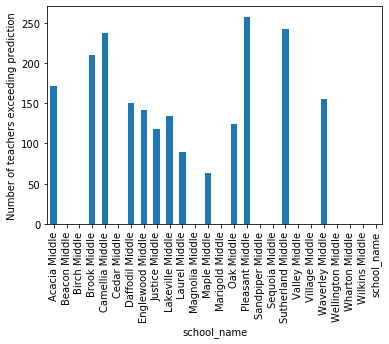

In [318]:
plt.ylabel('Number of teachers exceeding prediction')

no_mag_df.groupby('school_name')['dec_bound_plus'].sum().plot(kind='bar')


In [317]:
dec_bound_plus_list = no_mag_df.groupby('school_name')['dec_bound_plus'].sum()
dec_bound_plus_list

school_name
Acacia Middle        171
Beacon Middle          0
Birch Middle           0
Brook Middle         210
Camellia Middle      237
Cedar Middle           0
Daffodil Middle      150
Englewood Middle     142
Justice Middle       118
Lakeville Middle     134
Laurel Middle         89
Magnolia Middle        0
Maple Middle          63
Marigold Middle        0
Oak Middle           124
Pleasant Middle      258
Sandpiper Middle       0
Sequoia Middle         0
Sutherland Middle    243
Valley Middle          0
Village Middle         0
Waverley Middle      155
Wellington Middle      0
Wharton Middle         0
Wilkins Middle         0
school_name            0
Name: dec_bound_plus, dtype: int64

While it would appear that  Pleasant Middle is the clear choice, a look at their 
average IEP pct shows that they have a much lower IEP population. Camelia Middle and Southerland Middle are the best choices.

In [309]:
group_mean_iep

school_name
Acacia Middle        11.874505
Beacon Middle        15.270374
Birch Middle         14.465227
Brook Middle         11.370822
Camellia Middle      17.658203
Cedar Middle         15.886952
Daffodil Middle      17.679650
Englewood Middle     17.947320
Justice Middle       18.049718
Lakeville Middle     19.787777
Laurel Middle        16.539893
Magnolia Middle      13.717850
Maple Middle         14.088082
Marigold Middle      12.095279
Oak Middle           15.888473
Pleasant Middle       8.551246
Sandpiper Middle     16.661487
Sequoia Middle       16.223565
Sutherland Middle    13.272693
Valley Middle        13.854976
Village Middle       13.456495
Waverley Middle      17.752612
Wellington Middle    11.168077
Wharton Middle       13.318624
Wilkins Middle       14.466700
school_name                NaN
Name: sch_catchment_area_iep_pct, dtype: float64

In [320]:
np.mean(group_mean_iep)

14.841863959445789

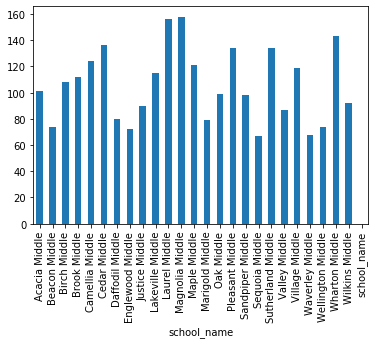

In [314]:
no_mag_df['t_stay']= pd.to_numeric(no_mag_df['t_stay'], errors = 'coerce')


#Which of the two, Camelia Middle and Southerland Middle, have the best teacher retention rates?
no_mag_df.groupby('school_name')['t_stay'].sum().plot(kind='bar')



In [315]:
t_stay_mean = no_mag_df.groupby('school_name')['t_stay'].mean()

In [316]:
t_stay_mean

school_name
Acacia Middle        0.590643
Beacon Middle        0.437870
Birch Middle         0.514286
Brook Middle         0.533333
Camellia Middle      0.523207
Cedar Middle         0.533333
Daffodil Middle      0.533333
Englewood Middle     0.507042
Justice Middle       0.466321
Lakeville Middle     0.569307
Laurel Middle        0.577778
Magnolia Middle      0.607692
Maple Middle         0.587379
Marigold Middle      0.459302
Oak Middle           0.529412
Pleasant Middle      0.519380
Sandpiper Middle     0.569767
Sequoia Middle       0.462069
Sutherland Middle    0.551440
Valley Middle        0.576159
Village Middle       0.540909
Waverley Middle      0.438710
Wellington Middle    0.521127
Wharton Middle       0.586066
Wilkins Middle       0.528736
school_name               NaN
Name: t_stay, dtype: float64

In [322]:
np.mean(t_stay_mean)

0.5305840425500711